In [1]:
!pip install scikeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import sklearn.model_selection as ms
from keras.utils.np_utils import to_categorical   
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from scikeras.wrappers import KerasClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from prettytable import PrettyTable
import tensorflow
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Data'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Data


In [4]:
wine_df = pd.read_csv('winequality-white.csv', sep=';')
# Tách features và target
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']



In [ ]:
wine_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# Kiểm tra xem có cột nào chứa giá trị thiếu không
wine_df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Kiểm tra thống kê mô tả của dữ liệu
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Vấn đề dữ liệu**

Dataset WineQuanlity_White có 11 thuộc tính và 1 biến phân lớp với 4898 mẫu dữ liệu


Tất cả các thuộc tính dataset đều có định lượng liên tục 


Khống có giá trị nào null trông mẫu dữ liệu


In [ ]:
count = wine_df['quality'].value_counts()
count

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

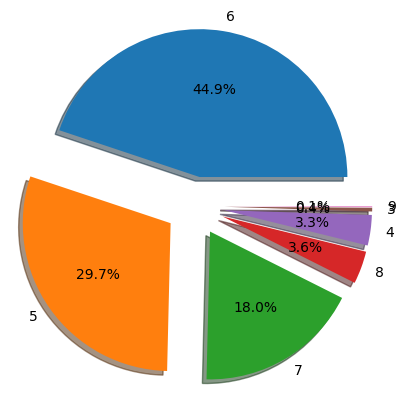

In [ ]:
plt.pie(count.values,explode=(0.2,0.2,0.2,0.2,0.2,0.2,0.2), labels=count.index,autopct='%1.1f%%', shadow=True)
plt.show()

**Mất cân bằng dữ liệu**: Phân bố nhãn (label) của dataset không cân bằng. Cụ thể, số lượng mẫu dữ liệu về (6) chiếm khoảng 44,9% trong khi số lượng mẫu dữ liệu về (1) chiếm khoảng 29,7% còn lại các class khác chiếm số lượng rất nhỏ trong dataset. Điều này dẫn đến sự thiếu chính xác của mô hình trong việc dự đoán các mẫu dữ liệu thuộc class thiểu số.

Chuyển dữ liệu về phân lớp nhị phân tăng độ cân bằng dữ liệu giúp tắng độ chính xác

In [ ]:
num_columns = wine_df.select_dtypes(include=['number']).drop(columns="quality").columns
palette = sns.color_palette("Spectral")
#boxplot
sns.set_style("white")
plt.figure(figsize=(15, 10))

i=1 
for col in num_columns:
    
    plt.subplot(4, 3, i)
    sns.boxplot(data=wine_df, x=col, palette=palette)
    plt.title(col+" distribution" ,fontsize=20)
    i=i+1 
    
plt.tight_layout()


In [ ]:
# Lấy ra danh sách tên các đặc trưng định lượng và định tính
numerical = wine_df.iloc[:, :-1].select_dtypes(include=np.number).columns.tolist()
categorical = wine_df.iloc[:, :-1].select_dtypes(bool).columns.tolist()

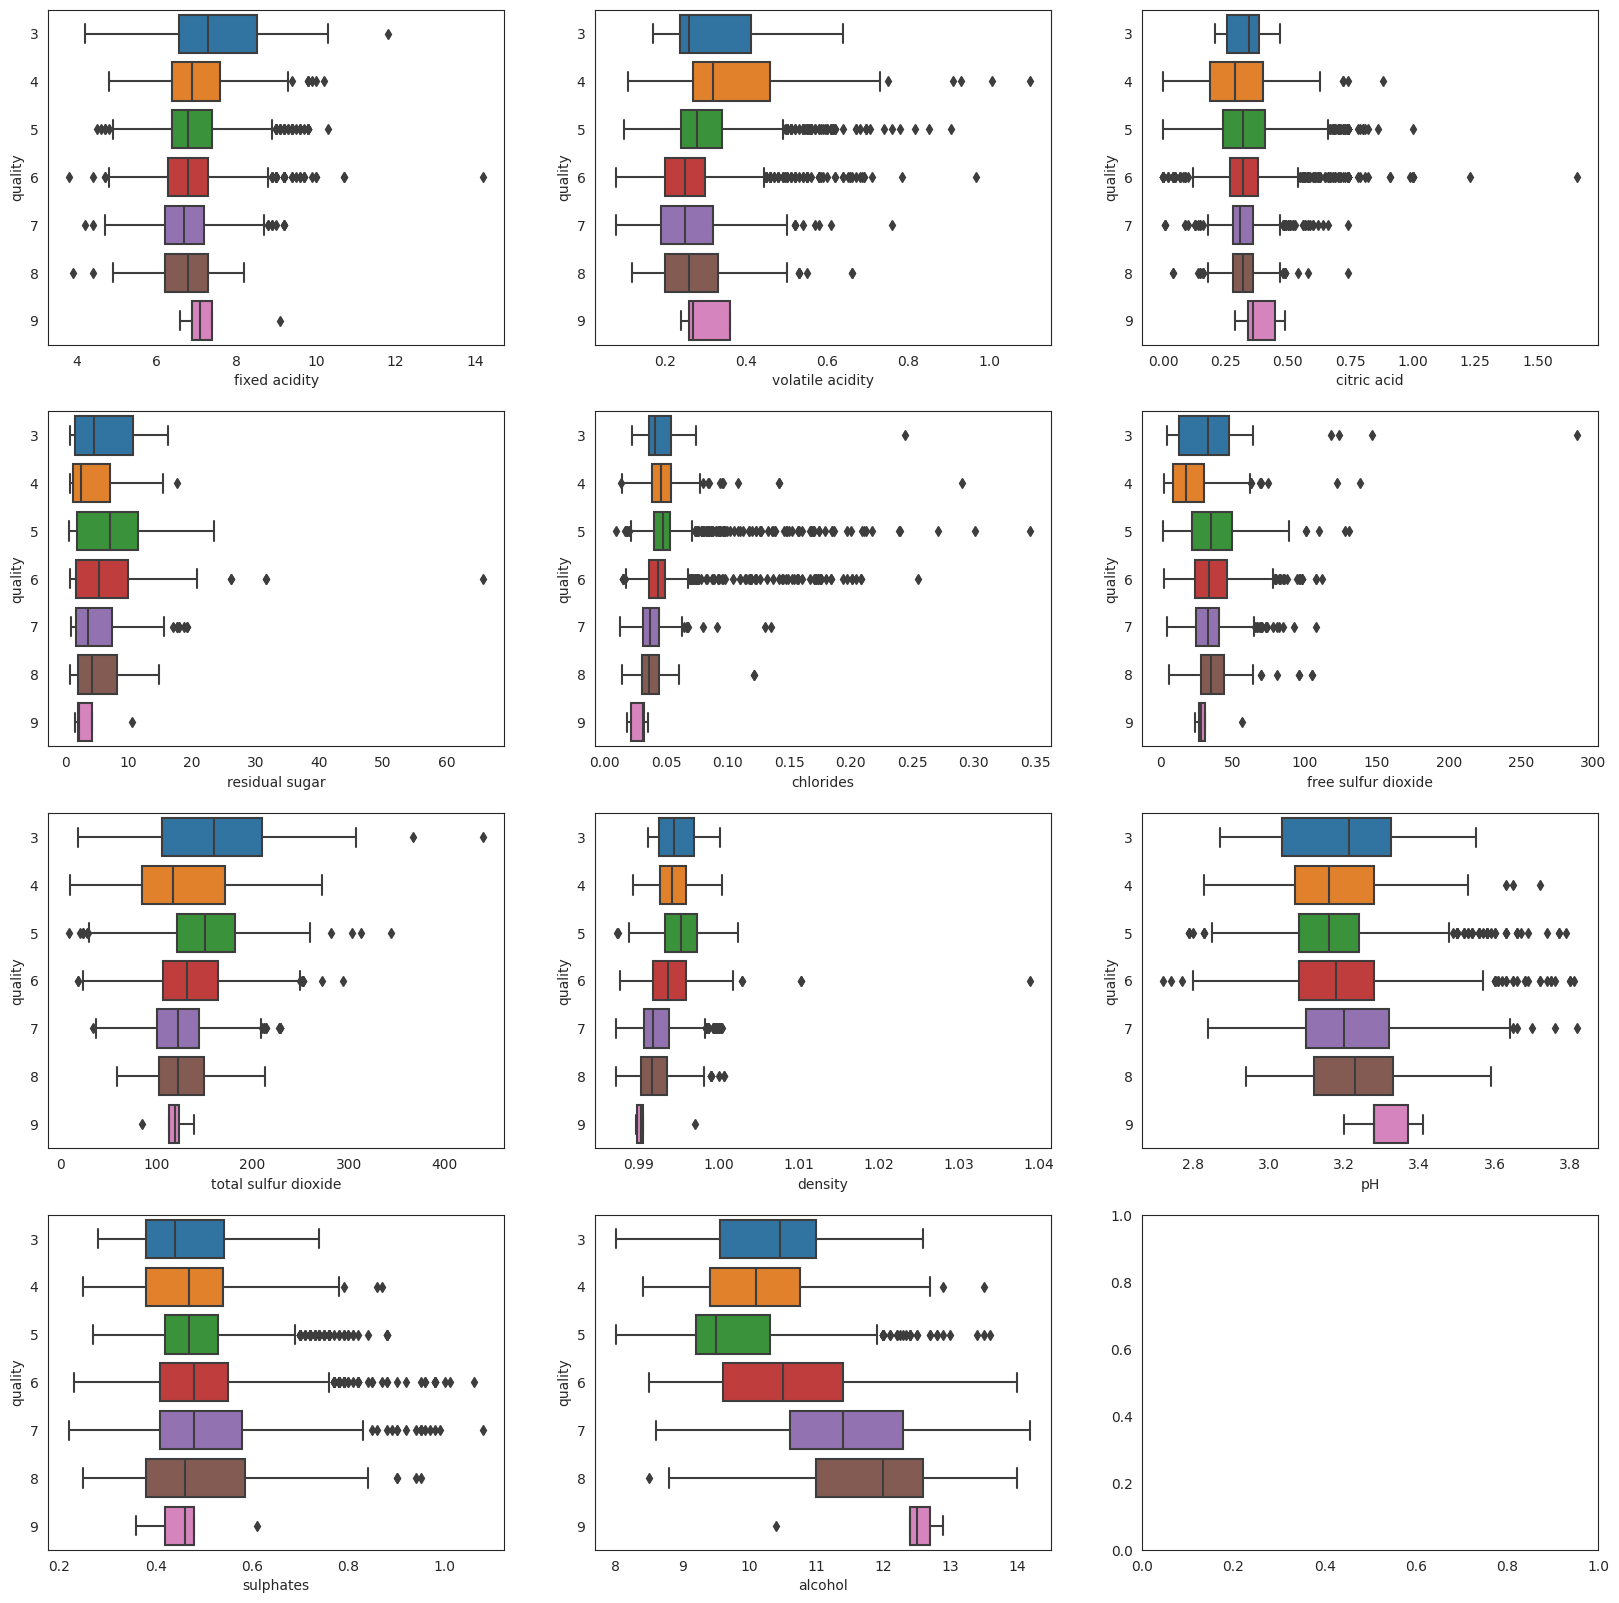

In [ ]:
# Biểu đồ hộp thể hiện quan hệ giữa đặc trưng định lượng và biến phân lớp
fig, axs = plt.subplots(4, 3, figsize=(20,20))

for ax, feature in zip(axs.flat, numerical):
    sns.boxplot(ax=ax, x=feature, y='quality', data=wine_df, orient='h')

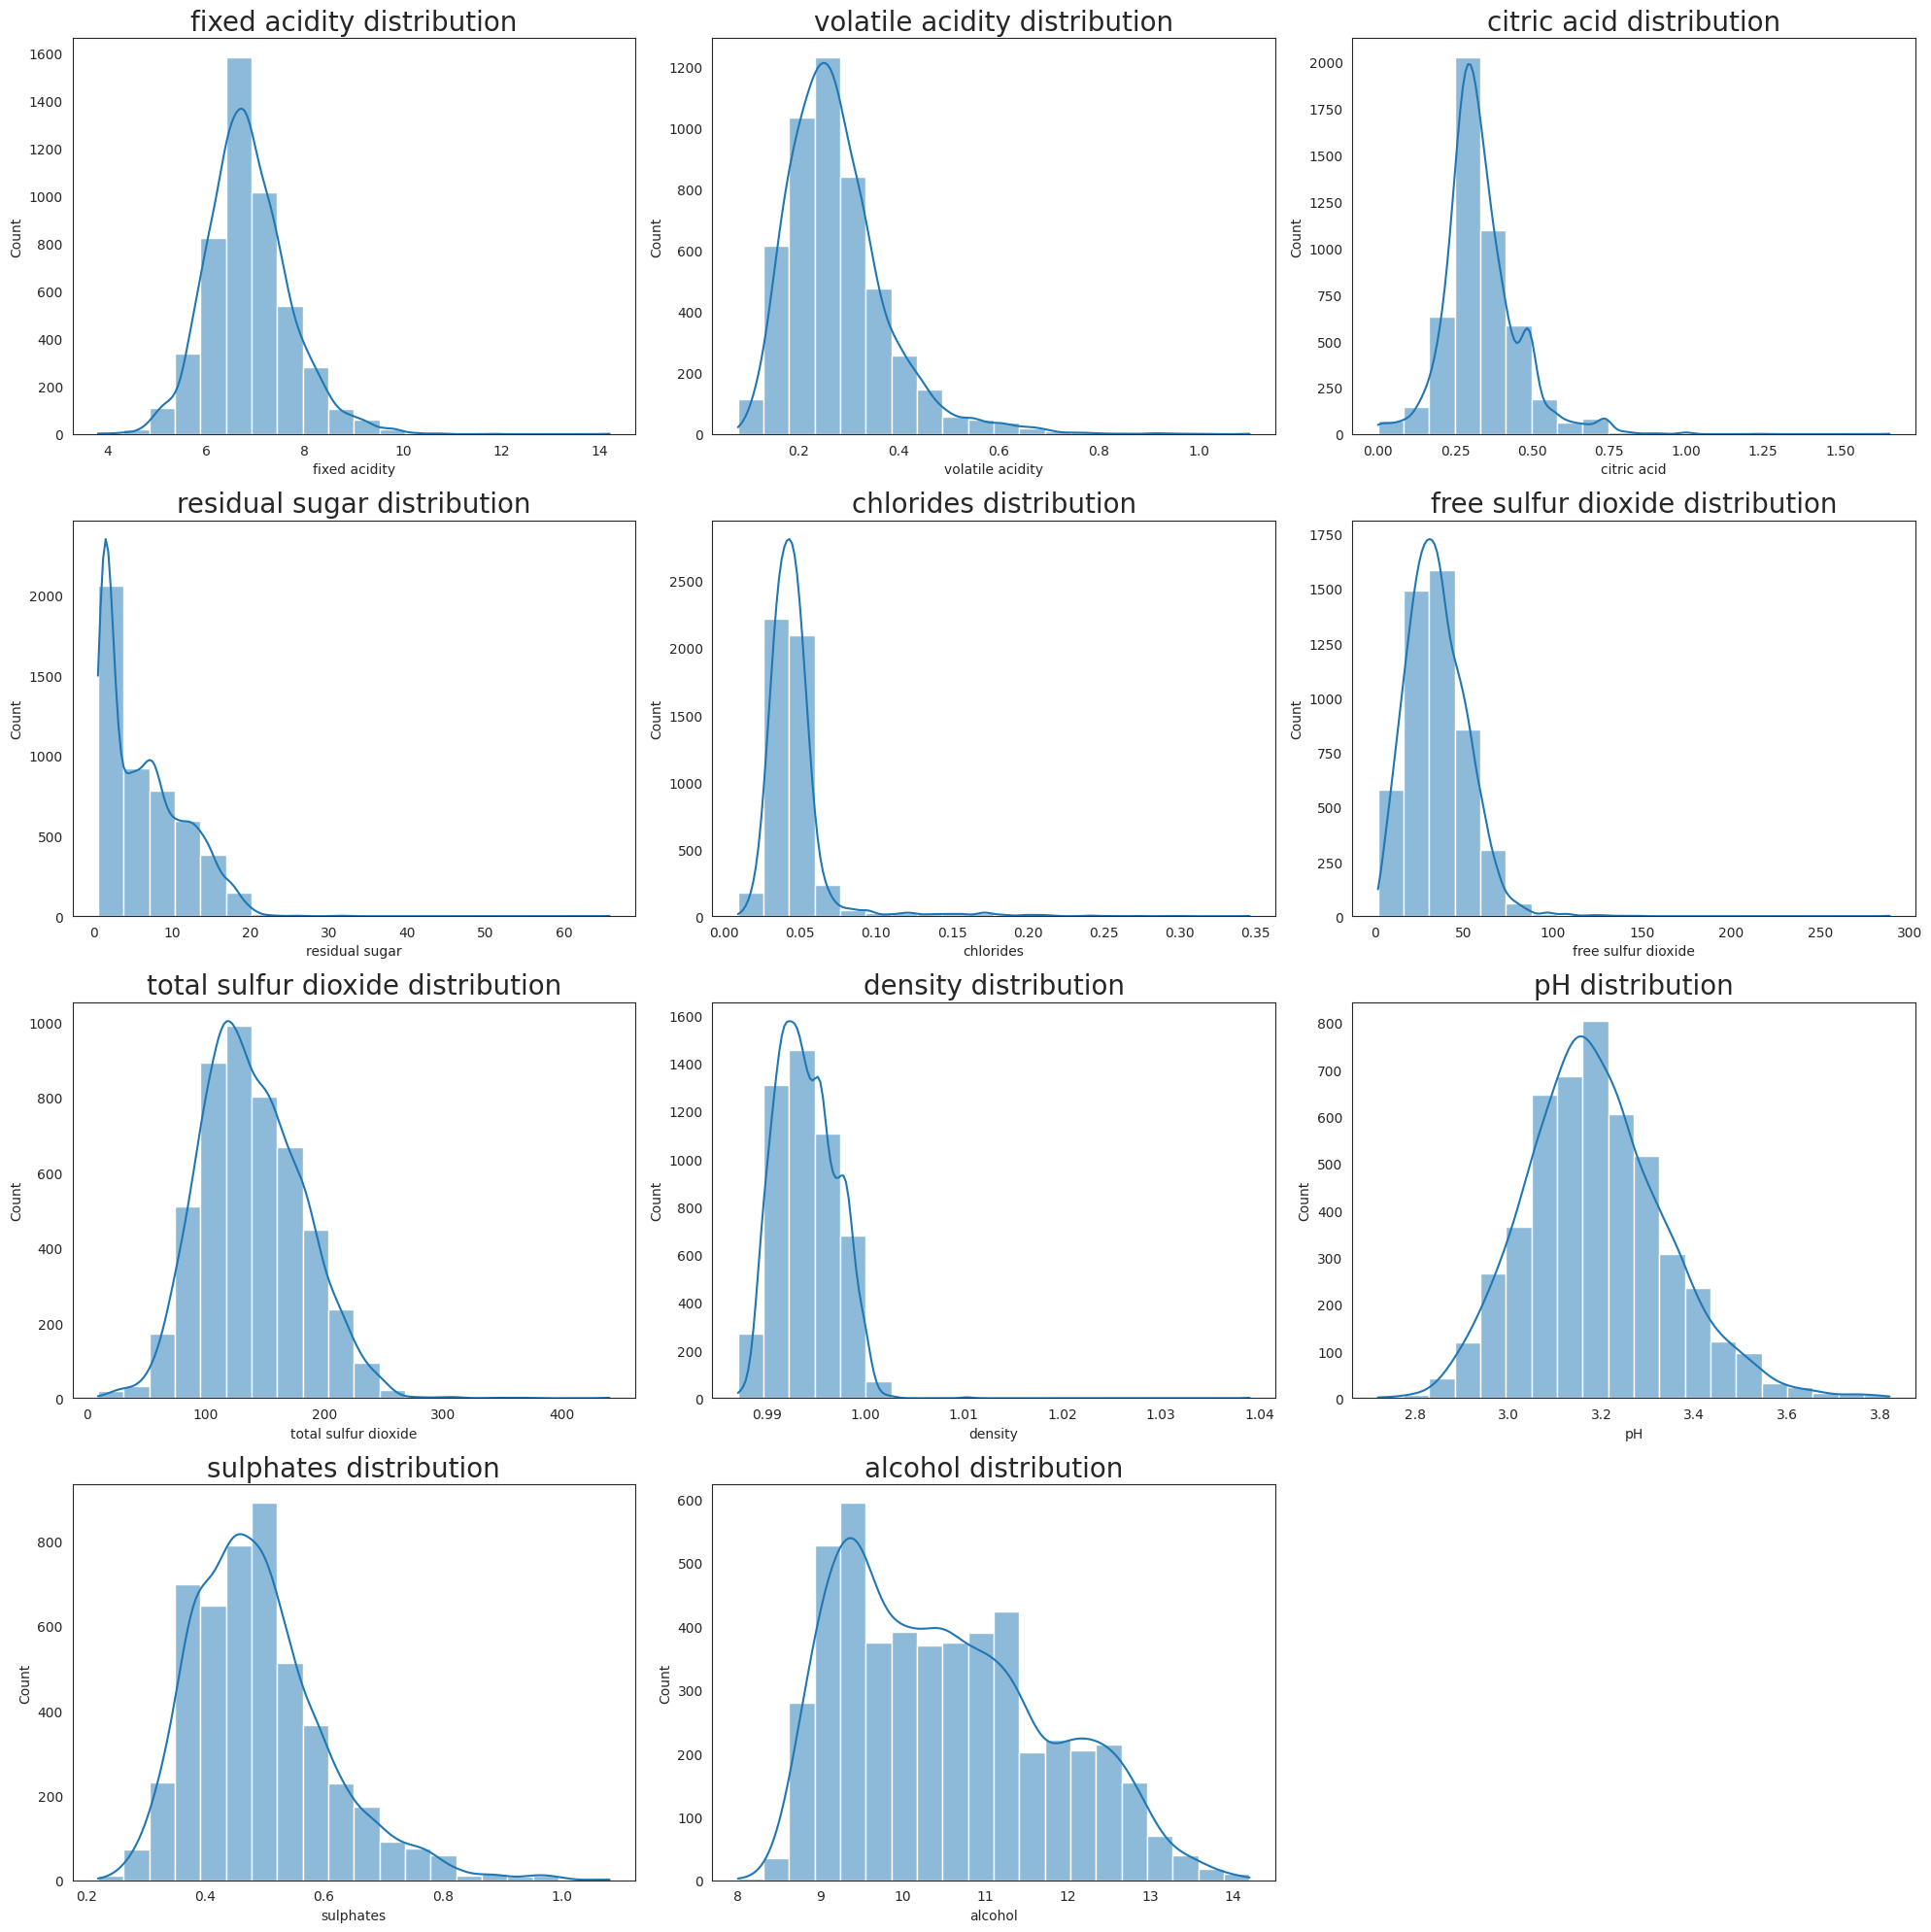

In [ ]:
#histgram
sns.set_style("white")
plt.figure(figsize=(20, 20))

i=1 
for col in num_columns:
    
    plt.subplot(4, 3, i)
    sns.histplot(data=wine_df, x=col, kde=True, bins=20, multiple="stack", alpha=.5 ,palette=palette)  
    plt.title(col+" distribution" ,fontsize=20)
    i=i+1 
    
plt.tight_layout()

**Selection Feature**

<Axes: >

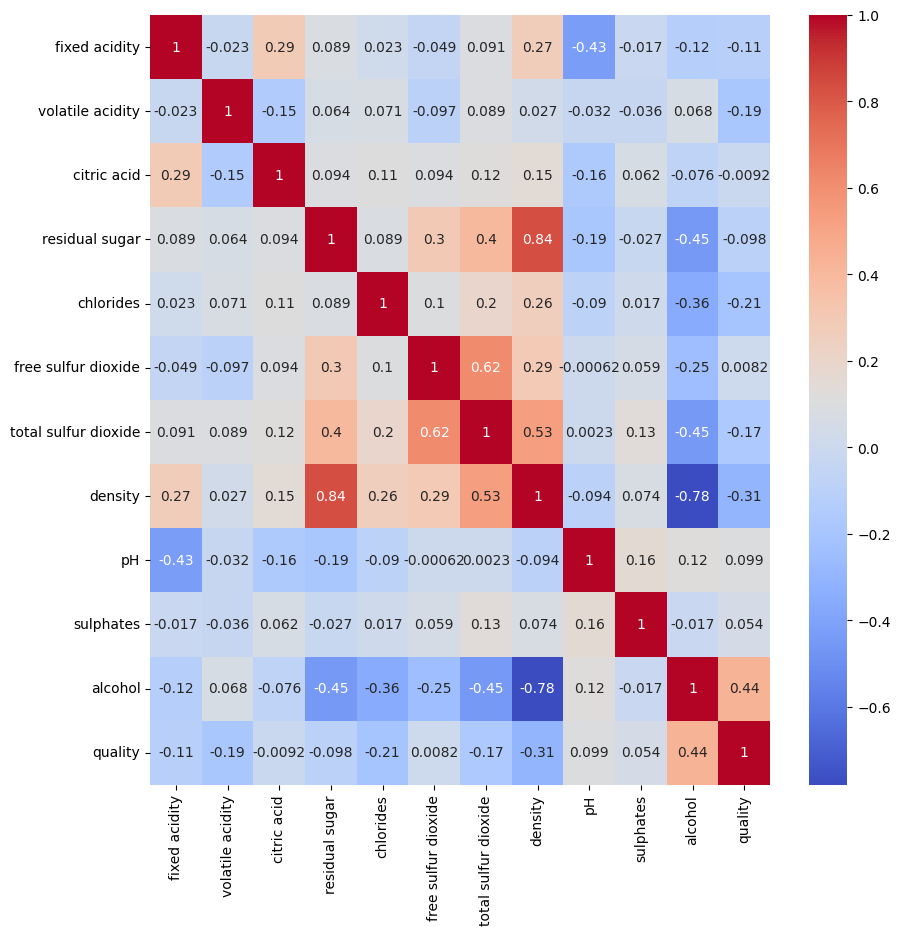

In [5]:
corr = wine_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

Theo heatmap trên ta thấy các biến có độ tương quan cao như density và residual sugar, density với total sulfur fioxide, total sulfur fioxide với free sulfur dioxide

Nên dùng VarianceThreshold để loại bỏ các biến có độ tương quan thấp. Làm giảm số lượng biến đặc trưng và cải thiện tốc độ huấn luyện cũng như độ chính xác mô hình.

In [7]:
from sklearn.feature_selection import VarianceThreshold

transform = VarianceThreshold(threshold=0.2)
X = transform.fit_transform(X)
n_features = X.shape[1]
print('>Threshold=%.2f, Features=%d' % (0.2, n_features))

>Threshold=0.20, Features=5


In [ ]:
winequality_names = ['bad', 'good']
y = pd.cut(y, bins = (2, 5.5, 9), labels = winequality_names)
from sklearn.preprocessing import LabelEncoder
print(y.value_counts())
le = LabelEncoder()
y = le.fit_transform(y)


good    3258
bad     1640
Name: quality, dtype: int64


In [10]:
print(wine_df.head(1))
X[0]

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   

   alcohol  quality  
0      8.8        6  


array([  7. ,  20.7,  45. , 170. ,   8.8])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
# Chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_test[:20]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

**Neural Network (Fully connected neural network)**

In [ ]:
optimizer = ['Adam', 'SGD', 'RMSprop']
batch_size = [32,64,128]
epochs = [15, 30, 60]
param_grid = {"optimizer":optimizer, "batch_size":batch_size, "epochs":epochs}

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 
model = KerasClassifier(build_fn=model)


In [ ]:
grid = GridSearchCV(estimator=model,param_grid= param_grid, n_jobs= -1 , refit=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
grid.fit(X_train, y_train)

Epoch 1/60
54/54 [==============================] - 1s 3ms/step - loss: 0.6265 - accuracy: 0.6319
Epoch 2/60
54/54 [==============================] - 0s 3ms/step - loss: 0.5805 - accuracy: 0.6870
Epoch 3/60
54/54 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.6922
Epoch 4/60
54/54 [==============================] - 0s 3ms/step - loss: 0.5524 - accuracy: 0.7068
Epoch 5/60
54/54 [==============================] - 0s 3ms/step - loss: 0.5458 - accuracy: 0.7118
Epoch 6/60
54/54 [==============================] - 0s 3ms/step - loss: 0.5415 - accuracy: 0.7156
Epoch 7/60
54/54 [==============================] - 0s 3ms/step - loss: 0.5379 - accuracy: 0.7144
Epoch 8/60
54/54 [==============================] - 0s 3ms/step - loss: 0.5358 - accuracy: 0.7162
Epoch 9/60
54/54 [==============================] - 0s 3ms/step - loss: 0.5333 - accuracy: 0.7194
Epoch 10/60
54/54 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.7173
Epoch 11/60
54/54 [

GridSearchCV(estimator=KerasClassifier(build_fn=<keras.engine.sequential.Sequential object at 0x7f06eee37f10>),
             n_jobs=-1,
             param_grid={'batch_size': [32, 64, 128], 'epochs': [15, 30, 60],
                         'optimizer': ['Adam', 'SGD', 'RMSprop']})

In [ ]:
model =grid.best_estimator_
print(model)
model = grid.best_estimator_.build_fn
print(model.summary())

KerasClassifier(
	model=None
	build_fn=<keras.engine.sequential.Sequential object at 0x7f06ee71d6c0>
	warm_start=False
	random_state=None
	optimizer=SGD
	loss=None
	metrics=None
	batch_size=64
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=60
	class_weight=None
)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 48        
                                                                 
 dense_16 (Dense)            (None, 8)                 72        
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
___________________________________________________

Epoch 1/60
62/62 [==============================] - 2s 8ms/step - loss: 0.5065 - accuracy: 0.7307
Epoch 2/60
62/62 [==============================] - 0s 6ms/step - loss: 0.5058 - accuracy: 0.7279
Epoch 3/60
62/62 [==============================] - 1s 8ms/step - loss: 0.5052 - accuracy: 0.7287
Epoch 4/60
62/62 [==============================] - 0s 5ms/step - loss: 0.5049 - accuracy: 0.7323
Epoch 5/60
62/62 [==============================] - 0s 8ms/step - loss: 0.5046 - accuracy: 0.7323
Epoch 6/60
62/62 [==============================] - 0s 3ms/step - loss: 0.5049 - accuracy: 0.7259
Epoch 7/60
62/62 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.7307
Epoch 8/60
62/62 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.7330
Epoch 9/60
62/62 [==============================] - 0s 3ms/step - loss: 0.5039 - accuracy: 0.7315
Epoch 10/60
62/62 [==============================] - 0s 3ms/step - loss: 0.5035 - accuracy: 0.7310
Epoch 11/60
62/62 [

Epoch 1/60
62/62 [==============================] - 0s 3ms/step - loss: 0.4931 - accuracy: 0.7428
Epoch 2/60
62/62 [==============================] - 0s 3ms/step - loss: 0.4930 - accuracy: 0.7400
Epoch 3/60
62/62 [==============================] - 0s 3ms/step - loss: 0.4927 - accuracy: 0.7453
Epoch 4/60
62/62 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.7423
Epoch 5/60
62/62 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.7441
Epoch 6/60
62/62 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.7425
Epoch 7/60
62/62 [==============================] - 0s 3ms/step - loss: 0.4921 - accuracy: 0.7443
Epoch 8/60
62/62 [==============================] - 0s 3ms/step - loss: 0.4937 - accuracy: 0.7464
Epoch 9/60
62/62 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.7425
Epoch 10/60
62/62 [==============================] - 0s 3ms/step - loss: 0.4922 - accuracy: 0.7471
Epoch 11/60
62/62 [

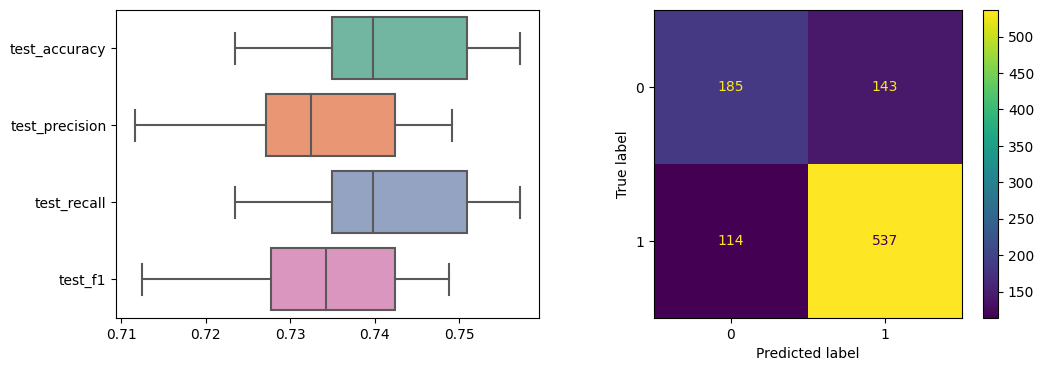

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tensorflow import keras

scores = []
precision_scores = []
recall_scores = []
f1_scores = []
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]  
    
    model.fit(X_train, y_train, epochs=60, batch_size=64, verbose=1)
    y_pred = model.predict(X_test)   
    y_pred = np.round(y_pred)
    score = model.evaluate(X_test, y_test, verbose=0)
    scores.append(score[1])
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])

results = pd.DataFrame({
    'test_accuracy': scores,
    'test_precision': precision_scores,
    'test_recall': recall_scores,
    'test_f1':  f1_scores
})
results.to_csv('{}_cv_scores.csv'.format(model.__class__.__name__), index=False)

print(results)
#  Hiển thị kết quả đánh giá dưới dạng biểu đồ hộp và confusion matrix
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=results, orient="h", palette="Set2", ax=axs[0])
# Calculate confusion matrix
display_labels = [0,1]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = display_labels)
disp.plot(ax=axs[1])
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold

def build_and_eval_model(clf):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
    model = clf
    # Đánh giá mô hình bằng Kiểm chứng chéo trên Training Set
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores).iloc[:, 2:]
    print('A. Cross Validation on Training Set')
    print(cv_scores.describe())

    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dùng mô hình dự đoán trên Test Set
    y_pred = model.predict(X_test)

    # Đánh giá kết quả dự đoán của mô hình trên Test Set
    final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred)],
                                 'precision': [precision_score(y_test, y_pred)],
                                 'recall': [recall_score(y_test, y_pred)],
                                 'f1': [f1_score(y_test, y_pred)]})
    print('B. Final Validation on Test Set')
    print(final_scores.to_string(index=False))

    # Trực quan hóa kết quả đánh giá
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
    # plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, ax=axs[1])
    display_labels = [0,1]
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = display_labels)
    disp.plot(ax=axs[1])
    plt.show()

    # Lưu kết quả đánh giá
    cv_scores.to_csv('{}_cv_scores.csv'.format(clf.__class__.__name__), index=False)
    final_scores.to_csv('{}_final_scores.csv'.format(clf.__class__.__name__), index=False)

**SVM Using GridSearchCV**

A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.793364        0.799144     0.920906   0.855667
std         0.011925        0.009627     0.011765   0.008236
min         0.778102        0.788280     0.905702   0.845214
25%         0.787017        0.792574     0.911184   0.850710
50%         0.791241        0.799250     0.918860   0.853978
75%         0.800875        0.803676     0.929825   0.862071
max         0.823615        0.826511     0.945175   0.875129
B. Final Validation on Test Set
 accuracy  precision  recall       f1
 0.786395   0.799639 0.90593 0.849473


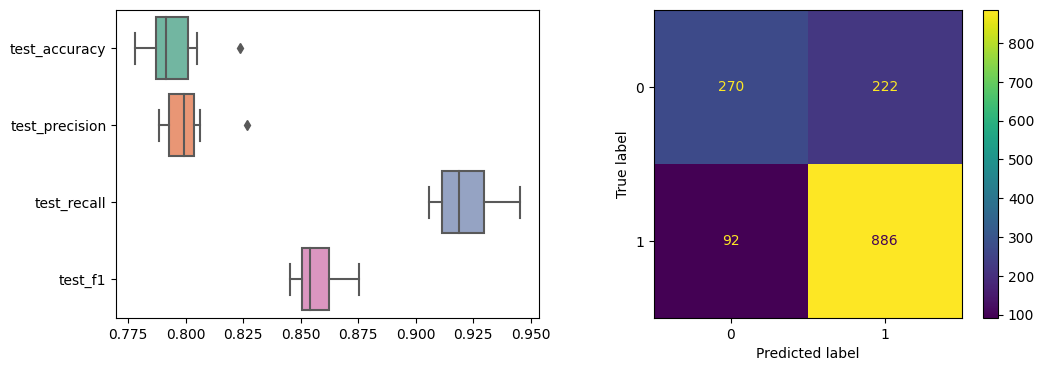

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid =ms.GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', refit=True, return_train_score=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
grid.fit(X_train,y_train)

build_and_eval_model(grid.best_estimator_)

**kNN Using GridSearchCV**

A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.809024        0.832359     0.892982   0.861519
std         0.014899        0.014393     0.012712   0.010369
min         0.787172        0.802326     0.875000   0.845339
25%         0.797232        0.821499     0.885965   0.854497
50%         0.811679        0.834677     0.890351   0.862912
75%         0.818513        0.842487     0.900219   0.868314
max         0.833819        0.859244     0.918860   0.877682
B. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.814286   0.828518 0.908998 0.866894


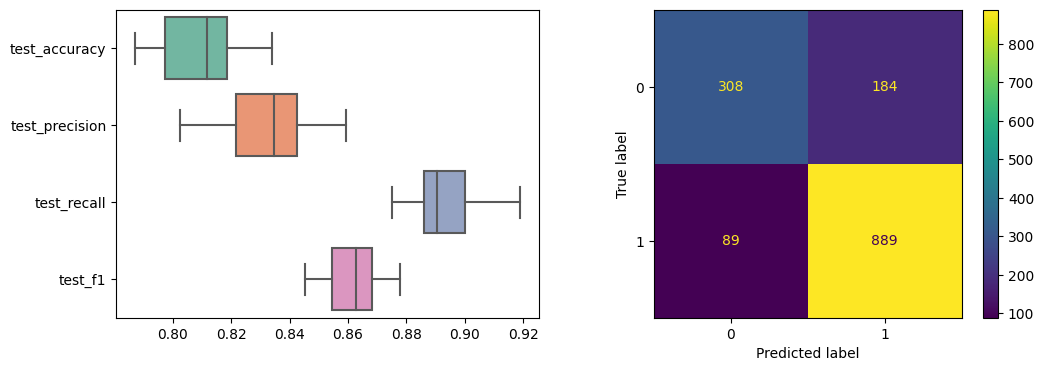

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
grid =ms.GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid_params,scoring='accuracy', refit=True, return_train_score=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
grid.fit(X_train,y_train)

build_and_eval_model(grid.best_estimator_)

**GaussianNB**

A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.711592        0.789479     0.773246   0.781046
std         0.017499        0.020184     0.016511   0.011955
min         0.673469        0.742678     0.747807   0.760171
25%         0.698761        0.780178     0.762061   0.771807
50%         0.714286        0.788636     0.774123   0.782800
75%         0.725547        0.797539     0.781798   0.789511
max         0.734694        0.823113     0.813596   0.800431
B. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.689116   0.767179 0.764826 0.766001


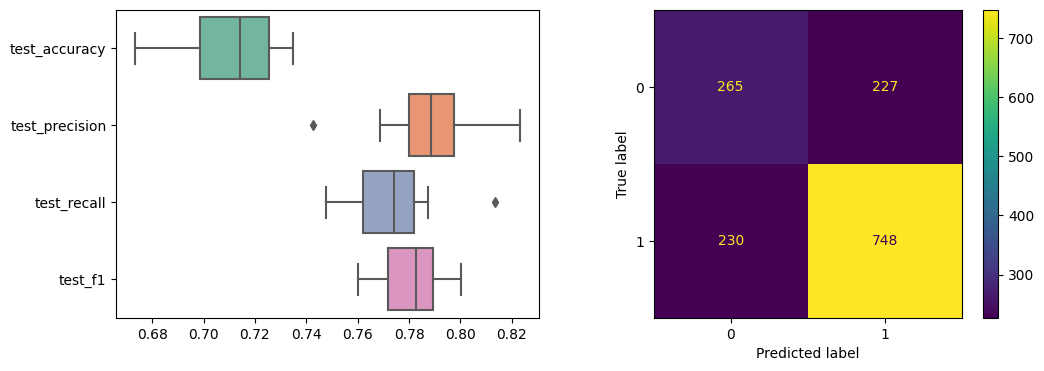

In [ ]:
param_grid_nb = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]
}
nb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)
build_and_eval_model(grid_search_nb.best_estimator_)

**RandomForestClassifier**

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.822736        0.843508     0.900877   0.871142
std         0.015615        0.014558     0.015643   0.011232
min         0.788321        0.819302     0.875000   0.846235
25%         0.814869        0.835683     0.889254   0.864875
50%         0.825073        0.840816     0.901316   0.871636
75%         0.830657        0.854916     0.914474   0.876733
max         0.849635        0.867368     0.925439   0.891235
B. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.831973   0.843838 0.917178 0.878981


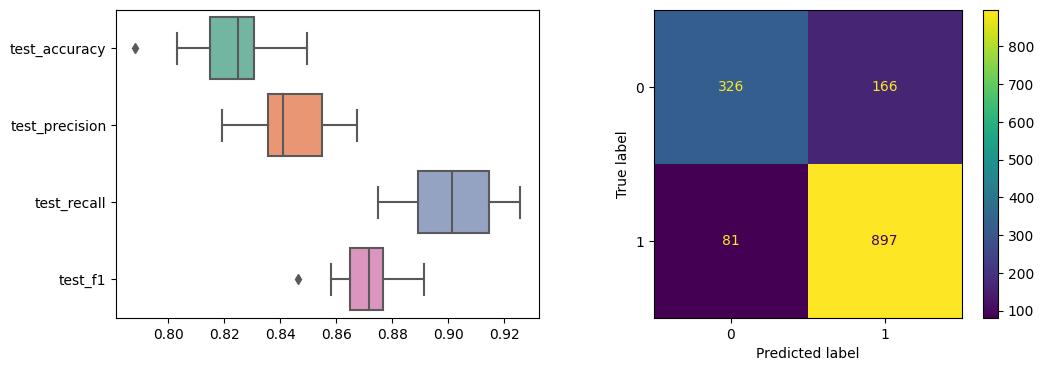

In [ ]:
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
grid_search_rf.fit(X_train, y_train)
build_and_eval_model(grid_search_rf.best_estimator_)

**Decision Tree**

A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.761478        0.812127     0.834795   0.823015
std         0.022697        0.017140     0.030190   0.018408
min         0.732847        0.793249     0.782895   0.796892
25%         0.744169        0.800398     0.810307   0.807880
50%         0.758017        0.806742     0.844298   0.822650
75%         0.774781        0.820913     0.856360   0.837090
max         0.810219        0.849785     0.881579   0.859002
B. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.769388   0.814778 0.845603 0.829905


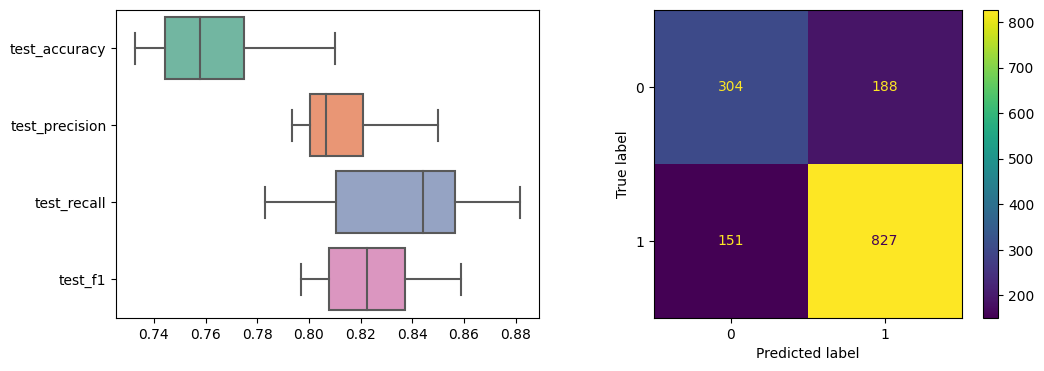

In [ ]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
build_and_eval_model(grid_search_dt.best_estimator_)

**TỔNG KẾT**

In [ ]:
clf_names = ['SVC', 'KNeighborsClassifier', 'GaussianNB',
            'RandomForestClassifier', 'DecisionTreeClassifier', 'Sequential']
score_names = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
def build_plots(title):
    model_cv_scores = {clf_name: pd.read_csv('{}_cv_scores.csv'.format(clf_name)) for clf_name in clf_names}
    fig, axs = plt.subplots(2,2, figsize=(12,6))

    for score_name, ax in zip(score_names, axs.flat):
        score_data = pd.DataFrame({clf_name: model_cv_scores[clf_name][score_name] for clf_name in clf_names})
        sns.boxplot(data=score_data, orient="h", palette="Set2", ax=ax)
        ax.set_title(score_name)
    
    fig.suptitle(title)
    plt.tight_layout()


    


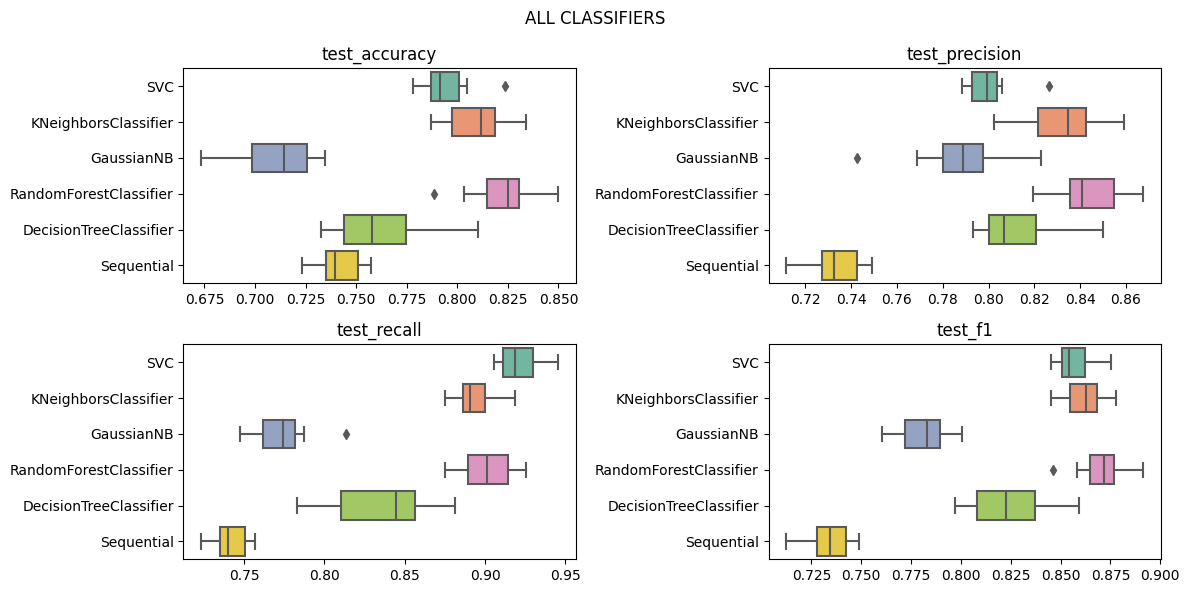

In [ ]:
build_plots('ALL CLASSIFIERS')


Kết quả thấy được độ chính cao khi dùng RandomForestClasssifier và kNN và thấp nhất đối với GaussianNB


> GaussianNB nhận được score thấp vì dataset gặp trường hợp các lớp có phân bố quá quá khác biệt




